# Salary estimation using k-nearest neighbour 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
#local dataset

In [3]:
df=pd.read_csv(r'C:\Users\Malini\Downloads\knn-lab-3.csv')
print(df)

       age  education.num  Capital.gain  hours per week income
0       58             10             0              29  >=50K
1       84              4             0              39  >=50K
2       92             10             0              34  >=50K
3       61             15             0              20  >=50K
4       41              6             0              21  <=50K
...    ...            ...           ...             ...    ...
34994   83             10             0              40  <=50K
34995   52              6             0              33  <=50K
34996   21             15             0              30  >=50K
34997   43             12             0              25  >=50K
34998   49             10             0              39  >=50K

[34999 rows x 5 columns]


In [4]:
#summarize dataset

In [11]:
df.shape
df.head

<bound method NDFrame.head of        age  education.num  Capital.gain  hours per week income
0       58             10             0              29  >=50K
1       84              4             0              39  >=50K
2       92             10             0              34  >=50K
3       61             15             0              20  >=50K
4       41              6             0              21  <=50K
...    ...            ...           ...             ...    ...
34994   83             10             0              40  <=50K
34995   52              6             0              33  <=50K
34996   21             15             0              30  >=50K
34997   43             12             0              25  >=50K
34998   49             10             0              39  >=50K

[34999 rows x 5 columns]>

In [6]:
#mapping salary data to binary value

In [13]:
income_set=set(df['income'])
df['income']=df['income'].map({'<=50K':0,'>=50K':1}).astype(int)
print(df.head(20))

    age  education.num  Capital.gain  hours per week  income
0    58             10             0              29       1
1    84              4             0              39       1
2    92             10             0              34       1
3    61             15             0              20       1
4    41              6             0              21       0
5    43              9             0              21       0
6    67             14             0              31       1
7    56              7             0              18       1
8    36             13             0              37       1
9    53              4             0              29       0
10   28             14             0              29       1
11   67             12             0              22       1
12   39              9             0              23       0
13   34              6             0              33       1
14   28              7             0              27       1
15   41              8  

In [15]:
x=df.iloc[:,:-1].values                       #segregatting x and y value 
x

array([[58, 10,  0, 29],
       [84,  4,  0, 39],
       [92, 10,  0, 34],
       ...,
       [21, 15,  0, 30],
       [43, 12,  0, 25],
       [49, 10,  0, 39]], dtype=int64)

In [16]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train)

[[-0.80375342 -1.01900174  0.          0.45514564]
 [ 0.65131217  0.43400265  0.          0.9051143 ]
 [ 0.37848737 -1.6002035   0.          1.20509341]
 ...
 [ 0.46942897  1.59640617  0.          1.20509341]
 [ 1.42431576 -0.43779998  0.         -0.59478124]
 [ 0.74225377  0.14340177  0.         -0.74477079]]


In [21]:
#finding the best K-value

In [25]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [26]:
#calculating error for the K values

Text(0, 0.5, 'mean error')

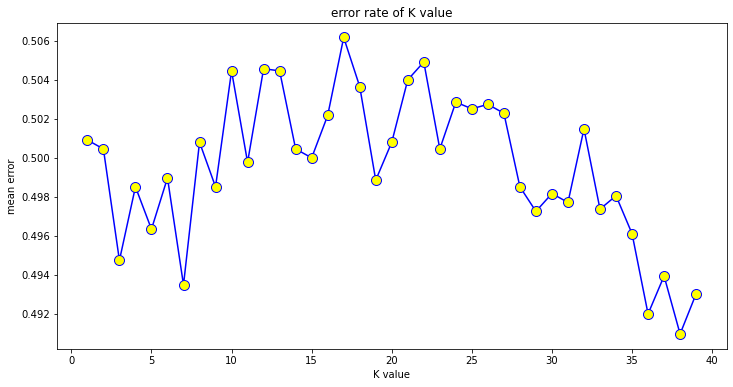

In [39]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i=model.predict(x_test)
    error.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='blue',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('error rate of K value')
plt.xlabel('K value')
plt.ylabel('mean error')

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=39,metric='minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=39)

In [42]:
y_pred=model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


[[1 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cm=confusion_matrix(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("confusion matrix")
print(f1)
print(cm)
print("accuracy of the model: {0}%".format(accuracy_score(y_test,y_pred)*100))

confusion matrix
0.49872182198466186
[[2290 2084]
 [2230 2146]]
accuracy of the model: 50.69714285714285%


In [44]:
#predicting whether new customer with age&salary will buy or not

In [47]:
age=int(input("enter the age:"))
edu=int(input("enter the education:"))
cg=int(input("enter the capital gain:"))
wh=int(input("enter work per week:"))
newemp=[[age,edu,cg,wh]]
result=model.predict(sc.transform(newemp))
print(result)
if result==1:
    print("income above 50k")
else:
    print("income below 50k")

enter the age:45
enter the education:10
enter the capital gain:5
enter work per week:72
[1]
income above 50k
